# 잔차 분석

## 잔차분석의 이해

#### 잔차

실제 관측값과 예측값의 사이

즉, 예측값에 대한 오차를 의미함

$잔차 = 실제관측값 - 예측값$ 

#### 잔차 분석

회귀분석 수행 후 회귀 분석이 적절하게 수행되었는지, 모델이 데이터에 적합한지를 평가하기 위해 사용

1. 잔차의 선형성
2. 잔차의 정규성
3. 잔차의 등분산성
4. 잔차의 독립성

## 01. 작업준비

패키지 참조


In [22]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
import os
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from scipy import stats
from scipy.stats import shapiro, probplot


sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

#### 그래프 초기화

In [11]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

#### 데이터 가져오기

In [12]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 회귀분석 수행

In [13]:
ols = my_ols(df, x='speed', y='dist')

['speed', 'dist']


## 02. 잔차분석 수행

#### 잔차 구하기

예측값

In [14]:
y_fitted = ols.fit.predict(df['speed'])
y_fitted

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

회귀분석 결과에 내장된 예측값

`predict()` 함수의 결과와 동일함

In [15]:
y_fitted = ols.fit.fittedvalues
y_fitted

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

잔차(직접계산)

In [17]:
residual = df['dist'] - y_fitted
residual

0      3.849460
1     11.849460
2     -5.947766
3     12.052234
4      2.119825
5     -7.812584
6     -3.744993
7      4.255007
8     12.255007
9     -8.677401
10     2.322599
11   -15.609810
12    -9.609810
13    -5.609810
14    -1.609810
15    -7.542219
16     0.457781
17     0.457781
18    12.457781
19   -11.474628
20    -1.474628
21    22.525372
22    42.525372
23   -21.407036
24   -15.407036
25    12.592964
26   -13.339445
27    -5.339445
28   -17.271854
29    -9.271854
30     0.728146
31   -11.204263
32     2.795737
33    22.795737
34    30.795737
35   -21.136672
36   -11.136672
37    10.863328
38   -29.069080
39   -13.069080
40    -9.069080
41    -5.069080
42     2.930920
43    -2.933898
44   -18.866307
45    -6.798715
46    15.201285
47    16.201285
48    43.201285
49     4.268876
dtype: float64

회귀분석 결과에 내장된 잔차값

In [18]:
residual = ols.fit.resid
residual

0      3.849460
1     11.849460
2     -5.947766
3     12.052234
4      2.119825
5     -7.812584
6     -3.744993
7      4.255007
8     12.255007
9     -8.677401
10     2.322599
11   -15.609810
12    -9.609810
13    -5.609810
14    -1.609810
15    -7.542219
16     0.457781
17     0.457781
18    12.457781
19   -11.474628
20    -1.474628
21    22.525372
22    42.525372
23   -21.407036
24   -15.407036
25    12.592964
26   -13.339445
27    -5.339445
28   -17.271854
29    -9.271854
30     0.728146
31   -11.204263
32     2.795737
33    22.795737
34    30.795737
35   -21.136672
36   -11.136672
37    10.863328
38   -29.069080
39   -13.069080
40    -9.069080
41    -5.069080
42     2.930920
43    -2.933898
44   -18.866307
45    -6.798715
46    15.201285
47    16.201285
48    43.201285
49     4.268876
dtype: float64

분석결과가 내장하고 있는 독립변수 데이터 셋

In [19]:
ols.fit.model.exog

array([[ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  7.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 25.]])

원본 데이터프레임에 병합

In [20]:
df['예측값'] = y_fitted
df['잔차'] = residual
df.head()

,speed,dist,예측값,잔차
0,4,2,-1.849460,3.849460
1,4,10,-1.849460,11.849460
2,7,4,9.947766,-5.947766
3,7,22,9.947766,12.052234
4,8,16,13.880175,2.119825


#### 잔차의 선형성

잔차 시각화

잔차도에서 잔차가 어떠한 패턴을 그리지 않고 고르게 분포되있다면 단순 선형모델이 잘 알맞는 것이며 등분산성을 만족하므로 잔차가 선형성을 가진다.

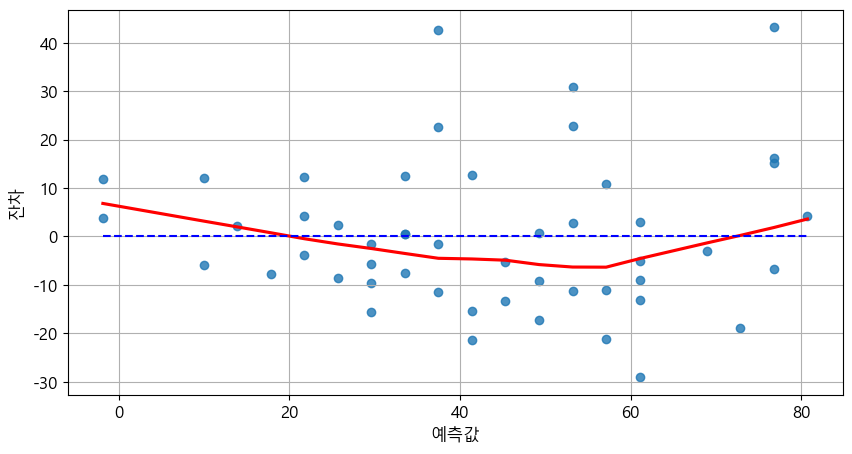

In [21]:
xmin = df['예측값'].min()
xmax = df['예측값'].max()
xrange = [xmin, xmax]
yrange = [0,0]

plt.figure()
sb.regplot(data= df, x = '예측값', y = '잔차', lowess = True, line_kws={'color': 'red'})
sb.lineplot(x=xrange, y=yrange, color = 'blue', linestyle= '--')
plt.grid()
plt.show()
plt.close()

### 잔차의 정규성
잔차가 정규분포를 따르는지를 확인

시각화

Q-Q plot으로 확인

잔차가 정규분포를 따르면 Q-Q Plot에서 점들이 점선을 따라 배치된다.

구해 놓은 예측값을 활용하여 zscore 값을 구한다.


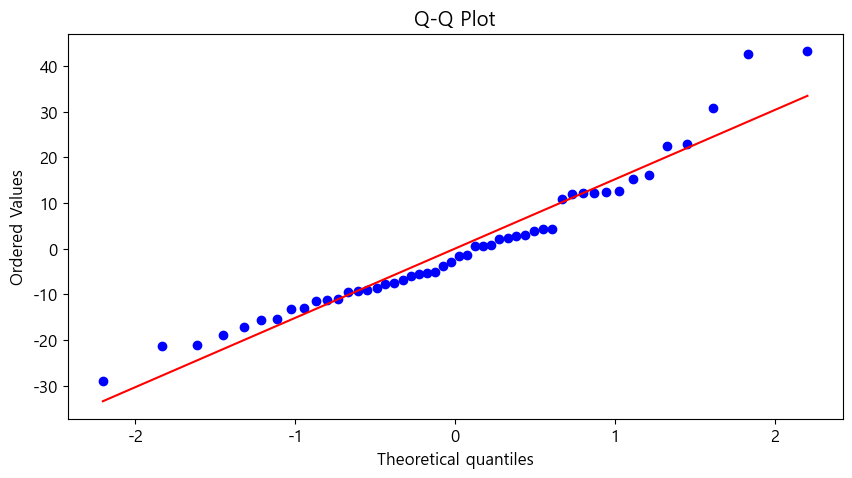

In [23]:
def plot_qq(residuals):
    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.show()

plot_qq(residual)